✍️ Настало время потренироваться в очистке данных! В этот раз тема особенно важная — поговорим о диабете.

Вам предоставлен набор данных (*https://lms.skillfactory.ru/assets/courseware/v1/6559ab1e1d17acac79bec5dc8052261b/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/diabetes_data.zip*), первоначально полученный в Национальном институте диабета, болезней органов пищеварения и почек. 

Этот набор данных создан для того, чтобы на основе определённых диагностических измерений предсказать, есть ли у пациента диабет. 

На выбор этих экземпляров из более крупной базы данных было наложено несколько ограничений. В частности, все пациенты здесь — женщины не моложе 21 года индейского происхождения Пима.

Прочитаем наши данные и выведем первые пять строк таблицы:

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

diabetes = pd.read_csv('data/diabetes_data.csv')
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Gender
0,6,98,58,33,190,34.0,0.430,43,0,Female
1,2,112,75,32,0,35.7,0.148,21,0,Female
2,2,108,64,0,0,30.8,0.158,21,0,Female
3,8,107,80,0,0,24.6,0.856,34,0,Female
4,7,136,90,0,0,29.9,0.210,50,0,Female


**Признаки в данных**
* *Pregnancies* — количество беременностей.

* *Glucose* — концентрация глюкозы в плазме через два часа при пероральном тесте на толерантность к глюкозе.

* *BloodPressure* — диастолическое артериальное давление (мм рт. ст.).

* *SkinThickness* — толщина кожной складки трицепса (мм).

* *Insulin* — двухчасовой сывороточный инсулин (ме Ед/мл).

* *BMI* — индекс массы тела (вес, кг / (рост, м)^2).

* *DiabetesPedigreeFunction* — функция родословной диабета (чем она выше, тем выше шанс наследственной заболеваемости).

* *Age* — возраст.

* *Outcome* — наличие диабета (0 — нет, 1 — да).

Давайте проведём небольшой разведывательный анализ, чтобы понять, с чем мы работаем ↓                
Определим чему равно число строк в таблице?

In [58]:
print(diabetes.shape[0])

778


In [59]:
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,778.000000,778.000000,778.000000,778.000000,778.000000,778.000000,778.000000,778.000000,778.000000
mean,3.848329,120.822622,69.035990,20.457584,79.521851,31.982262,0.470871,33.317481,0.344473
std,3.360782,31.883264,19.432323,15.954452,114.862405,7.853917,0.330669,11.816300,0.475502
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.241500,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,27.000000,32.000000,0.370000,29.000000,0.000000
75%,6.000000,140.000000,80.000000,32.000000,126.750000,36.500000,0.625500,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Начнём с поиска дубликатов в данных. Найдите все повторяющиеся строки в данных и удалите их. Для поиска используйте все признаки в данных. Сколько записей осталось в данных?

In [60]:
duplicates = diabetes[diabetes.duplicated()]
print('Число дубликтов: {}'.format(duplicates.shape[0]))
diabetes = diabetes.drop_duplicates()
print('Результирующее число записей: {}'.format(diabetes.shape[0]))

Число дубликтов: 10
Результирующее число записей: 768


Далее найдите все неинформативные признаки в данных и избавьтесь от них. В качестве порога информативности возьмите 0.95: удалите все признаки, для которых 95 % значений повторяются или 95 % записей уникальны. В ответ запишите имена признаков, которые вы нашли (без кавычек).

In [61]:
def low_informative_feature(data):
    #список неинформативных признаков
    low_information_cols = []
    #цикл по всем столбцам
    for col in data.columns:
        #наибольшая относительная частота в признаке
        top_freq = data[col].value_counts(normalize=True).max()
        #доля уникальных значений от размера признака
        nunique_ratio = data[col].nunique() / data[col].count()
        # сравниваем наибольшую частоту с порогом
        if top_freq > 0.95:
            low_information_cols.append(col)
        # сравниваем долю уникальных значений с порогом
        if nunique_ratio > 0.95:
            low_information_cols.append(col)
    return low_information_cols
low_information_cols = low_informative_feature(diabetes)
print(low_information_cols)

['Gender']


Попробуйте найти пропуски в данных с помощью метода *isnull()*.

**Спойлер**: ничего не найдёте. А они есть! Просто они скрыты от наших глаз. В таблице пропуски в столбцах *Glucose, BloodPressure, SkinThickness, Insulin и BMI* обозначены нулём, поэтому традиционные методы поиска пропусков ничего вам не покажут. Давайте это исправим!

Замените все записи, равные 0, в столбцах *Glucose, BloodPressure, SkinThickness, Insulin и BMI* на символ пропуска. Его вы можете взять из библиотеки numpy: np.nan.

Какая доля пропусков содержится в столбце *Insulin*? Ответ округлите до сотых.

Создайте функцию, которая возвращает np.nan, если её аргумент равен 0, в противном случае — возвращает аргумент. Воспользуйтесь методом apply() и примените созданную функцию для каждого перечисленного столбца.

In [62]:
def nan_function(x):
    return np.nan if x == 0 else x
diabetes["Glucose"] = diabetes["Glucose"].apply(nan_function)
diabetes["BloodPressure"] = diabetes["BloodPressure"].apply(nan_function)
diabetes["SkinThickness"] = diabetes["SkinThickness"].apply(nan_function)
diabetes["Insulin"] = diabetes["Insulin"].apply(nan_function)
diabetes["BMI"] = diabetes["BMI"].apply(nan_function)
diabetes.isnull().mean().round(2).sort_values(ascending=False)

Insulin                     0.49
SkinThickness               0.30
BloodPressure               0.05
Glucose                     0.01
BMI                         0.01
Pregnancies                 0.00
DiabetesPedigreeFunction    0.00
Age                         0.00
Outcome                     0.00
Gender                      0.00
dtype: float64

Удалите из данных признаки, где число пропусков составляет более 30 %. Сколько признаков осталось в ваших данных (с учетом удаленных неинформативных признаков в задании 8.2)?

In [63]:
diabetes = diabetes.drop(low_information_cols, axis=1)
print(diabetes.shape[1])

9


In [64]:
thresh = diabetes.shape[0]*0.7
diabetes = diabetes.dropna(thresh=thresh, axis=1)
print(diabetes.shape[1])

8


Удалите из данных только те строки, в которых содержится более двух пропусков одновременно. Чему равно результирующее число записей в таблице?

In [65]:
m = diabetes.shape[1]
diabetes = diabetes.dropna(thresh=m-2, axis=0)
print(diabetes.shape[0])

761


В оставшихся записях замените пропуски на медиану. Чему равно среднее значение в столбце *SkinThickness*? Ответ округлите до десятых.

In [67]:
null_data = diabetes.isnull().sum()
cols = null_data[null_data>0].index
for col in cols:
    diabetes[col] = diabetes[col].fillna(diabetes[col].median())
print(diabetes['SkinThickness'].mean().round(1))

29.1


Сколько выбросов найдёт классический метод межквартильного размаха в признаке *SkinThickness*?

In [69]:
def outliers_iqr_mod(data, feature, left=1.5, right=1.5, log_scale=False):
    if log_scale:
        x = np.log(data[feature])
    else:
        x= data[feature]
    quartile_1, quartile_3 = x.quantile(0.25), x.quantile(0.75),
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * left)
    upper_bound = quartile_3 + (iqr * right)
    outliers = data[(x<lower_bound) | (x > upper_bound)]
    cleaned = data[(x>lower_bound) & (x < upper_bound)]
    return outliers, cleaned
outliers, _ = outliers_iqr_mod(diabetes, 'SkinThickness')
print(f'Число выбросов по методу Тьюки: {outliers.shape[0]}')

Число выбросов по методу Тьюки: 87


Сколько выбросов найдёт классический метод z-отклонения в признаке *SkinThickness*?

In [71]:
def outliers_z_score_mod(data, feature, left=3, right=3, log_scale=False):
    if log_scale:
        x = np.log(data[feature]+1)
    else:
        x = data[feature]
    mu = x.mean()
    sigma = x.std()
    lower_bound = mu - left * sigma
    upper_bound = mu + right * sigma
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x > lower_bound) & (x < upper_bound)]
    return outliers, cleaned
outliers, _ = outliers_z_score_mod(diabetes, 'SkinThickness')
print(f'Число выбросов по методу z-отклонения: {outliers.shape[0]}')

Число выбросов по методу z-отклонения: 4


На приведённой гистограмме показано распределение признака *DiabetesPedigreeFunction*. Такой вид распределения очень похож на логнормальный, и он заставляет задуматься о логарифмировании признака. Найдите сначала число выбросов в признаке *DiabetesPedigreeFunction* с помощью классического метода межквартильного размаха.

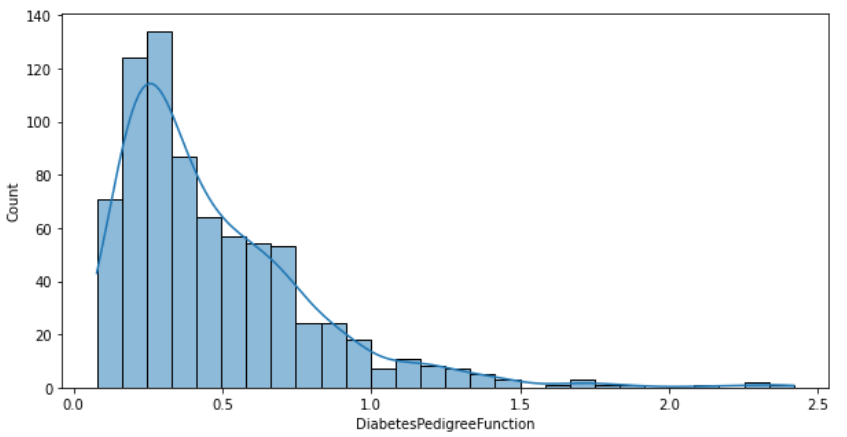

In [72]:
from IPython.display import Image
Image("data/dst-3-unit-1-mod-14-35.png")

In [73]:
def outliers_iqr_mod(data, feature, left=1.5, right=1.5, log_scale=False):
    if log_scale:
        x = np.log(data[feature])
    else:
        x= data[feature]
    quartile_1, quartile_3 = x.quantile(0.25), x.quantile(0.75),
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * left)
    upper_bound = quartile_3 + (iqr * right)
    outliers = data[(x<lower_bound) | (x > upper_bound)]
    cleaned = data[(x>lower_bound) & (x < upper_bound)]
    return outliers, cleaned
outliers, _ = outliers_iqr_mod(diabetes, 'DiabetesPedigreeFunction')
print(f'Число выбросов по методу Тьюки: {outliers.shape[0]}')

Число выбросов по методу Тьюки: 29


Затем найдите число выбросов в этом же признаке в логарифмическом масштабе (при логарифмировании единицу прибавлять не нужно!). Какова разница между двумя этими числами (вычтите из первого второе)?

In [74]:
def outliers_iqr_mod(data, feature, left=1.5, right=1.5, log_scale=False):
    if log_scale:
        x = np.log(data[feature])
    else:
        x = data[feature]
    quartile_1, quartile_3 = x.quantile(0.25), x.quantile(0.75),
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * left)
    upper_bound = quartile_3 + (iqr * right)
    outliers = data[(x<lower_bound) | (x> upper_bound)]
    cleaned = data[(x>lower_bound) & (x < upper_bound)]
    return outliers, cleaned
outliers, cleaned = outliers_iqr_mod(diabetes, 'DiabetesPedigreeFunction', log_scale=True)
print(f'Число выбросов по методу Тьюки: {outliers.shape[0]}')

Число выбросов по методу Тьюки: 0


In [75]:
def outliers_iqr_mod(data, feature, left=1.5, right=1.5, log_scale=False):
    if log_scale:
        x = np.log(data[feature])
    else:
        x= data[feature]
    quartile_1, quartile_3 = x.quantile(0.25), x.quantile(0.75),
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * left)
    upper_bound = quartile_3 + (iqr * right)
    outliers = data[(x<lower_bound) | (x > upper_bound)]
    cleaned = data[(x>lower_bound) & (x < upper_bound)]
    return outliers, cleaned
outliers, _ = outliers_iqr_mod(diabetes, 'DiabetesPedigreeFunction')
outliers_log, _ = outliers_iqr_mod(diabetes, 'DiabetesPedigreeFunction', log_scale=True)
print(outliers.shape[0] - outliers_log.shape[0])

29
